In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


warnings.filterwarnings("ignore")
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", lambda x : "%.2f" % x)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.neighbors import NearestNeighbors
from scipy.linalg import orthogonal_procrustes

# X-IIoTID dataset

In [3]:
x = pd.read_csv("/Users/denizbeyazgul/Documents/VISTA/X-IIoTID dataset.csv")
df_x = x.copy()
df_x.head()

,Date,Timestamp,Scr_IP,Scr_port,Des_IP,Des_port,Protocol,Service,Duration,Scr_bytes,Des_bytes,Conn_state,missed_bytes,is_syn_only,Is_SYN_ACK,is_pure_ack,is_with_payload,FIN or RST,Bad_checksum,is_SYN_with_RST,Scr_pkts,Scr_ip_bytes,Des_pkts,Des_ip_bytes,anomaly_alert,total_bytes,total_packet,paket_rate,byte_rate,Scr_packts_ratio,Des_pkts_ratio,Scr_bytes_ratio,Des_bytes_ratio,Avg_user_time,Std_user_time,Avg_nice_time,Std_nice_time,Avg_system_time,Std_system_time,Avg_iowait_time,Std_iowait_time,Avg_ideal_time,Std_ideal_time,Avg_tps,Std_tps,Avg_rtps,Std_rtps,Avg_wtps,Std_wtps,Avg_ldavg_1,Std_ldavg_1,Avg_kbmemused,Std_kbmemused,Avg_num_Proc/s,Std_num_proc/s,Avg_num_cswch/s,std_num_cswch/s,OSSEC_alert,OSSEC_alert_level,Login_attempt,Succesful_login,File_activity,Process_activity,read_write_physical.process,is_privileged,class1,class2,class3
0,9/01/2020,1578540956,192.168.2.199,49278,192.168.2.10,80,tcp,http,0.67369,13437,34924,1,0,True,True,True,True,True,False,False,105,18905,105,40392,TRUE,107658,210,311.7160712,159803.4704,0.5,0.5,0.300414275,0.699585725,9.207,5.55584206,10.994,1.356305275,4.864,1.873004004,0.311,0.224653066,74.624,8.245611196,12.297,10.38585004,8,10.50714043,4.297,2.723578712,2.146,0.102781321,915852.8,2507.97563,5.1,3.238826948,2806.2,158.7493622,1,5,0,0,0,0,0,0,Scanning_vulnerability,Reconnaissance,Attack
1,13/01/2020,1578871873,10.0.1.5,39769,131.236.3.92,53,udp,dns,0.000083,78,0,1,0,False,False,False,True,False,False,False,2,134,0,0,FALSE,212,2,24096.38554,2554216.867,1,0,1,0,12.326,6.674247823,2.895,1.604302029,3.778,2.099741889,2.741,5.327471164,78.263,8.869399134,6.6,5.713142743,0,0,6.6,5.713142743,0.612,0.037629775,910498.4,4044.112046,1,0.894427191,1561.6,247.0802299,0,0,0,0,0,0,0,0,Normal,Normal,Normal
2,9/01/2020,1578522486,172.24.1.80,59050,172.24.1.1,53,udp,dns,0.000132,38,38,1,0,False,False,False,True,False,False,False,1,66,1,66,FALSE,208,2,15151.51515,1575757.576,0.5,0.5,0.5,0.5,6.931,6.416007248,0.706,0.408905857,1.693,0.771635277,2.423,3.829809525,88.245,7.112108337,37.4,40.19004852,30.1,39.79811553,7.3,3.1,0.55,0.02,921020.4,2139.652645,1,0,1603.3,294.1390997,0,0,0,0,0,0,0,0,Normal,Normal,Normal
3,27/02/2020,1582757640,192.168.2.196,37966,192.168.2.10,1880,tcp,websocket,9.378481,1121,484,1,0,True,True,True,True,True,False,False,8,1545,6,804,FALSE,3954,14,1.492779055,421.6034558,0.571428571,0.428571429,0.67425392,0.32574608,10.244,7.932040343,1.965,1.514168088,3.941,1.709055002,0.509,0.425522032,83.339,10.20608686,29,26.57442379,23.3,26.12680616,5.7,6.229767251,0.708,0.026,915874.8,977.8851466,7.2,5.325410782,1685.3,467.8737116,0,0,1,1,1,1,1,1,Normal,Normal,Normal
4,16/12/2019,1576452612,172.24.1.80,38233,172.24.1.1,53,udp,dns,0.000074,-,-,1,0,False,False,False,True,False,False,False,-,-,-,-,FALSE,-,-,-,-,-,-,-,-,5.181,5.980458929,2.365,1.284462923,2.415,1.401151312,1.803,4.478256469,88.239,8.090017862,9.8,1.326649916,0.1,0.3,9.7,1.268857754,0.536,0.030066593,918213.2,2342.93836,0.6,0.489897949,1456.5,346.8847791,0,0,0,0,0,0,0,0,Normal,Normal,Normal


# wustl_iiot_2021

In [5]:
w = pd.read_csv("/Users/denizbeyazgul/Documents/VISTA/wustl_iiot_2021.csv")
df_w = w.copy()
df_w.head()

,StartTime,LastTime,SrcAddr,DstAddr,Mean,Sport,Dport,SrcPkts,DstPkts,TotPkts,DstBytes,SrcBytes,TotBytes,SrcLoad,DstLoad,Load,SrcRate,DstRate,Rate,SrcLoss,DstLoss,Loss,pLoss,SrcJitter,DstJitter,SIntPkt,DIntPkt,Proto,Dur,TcpRtt,IdleTime,Sum,Min,Max,sDSb,sTtl,dTtl,sIpId,dIpId,SAppBytes,DAppBytes,TotAppByte,SynAck,RunTime,sTos,SrcJitAct,DstJitAct,Traffic,Target
0,2019-08-19 12:23:28,2019-08-19 12:23:28,192.168.0.20,192.168.0.2,0,59034,502,10,8,18,508,644,1152,87486.09,67122.95,154609.05,169.69,131.98,320.53,2,2,4,18.18,527.43,11.52,5.89,7.41,6,0.05,0.00,1548786176,0.05,0.05,0.05,0,128,64,53331,64402,24,20,44,0.00,0.05,0,0.00,0.00,normal,0
1,2019-08-19 15:13:24,2019-08-19 15:13:24,192.168.0.20,192.168.0.2,0,55841,502,10,8,18,508,644,1152,88077.30,67576.55,155653.84,170.84,132.88,322.70,2,2,4,18.18,17.23,13.25,7.53,7.34,6,0.05,0.00,1548882816,0.05,0.05,0.05,0,128,64,37167,31590,24,20,44,0.00,0.05,0,0.00,0.00,normal,0
2,2019-08-19 13:41:31,2019-08-19 13:41:31,192.168.0.20,192.168.0.2,0,63774,502,10,8,18,508,644,1152,89587.39,68735.16,158322.55,173.77,135.15,328.23,2,2,4,18.18,522.99,12.31,5.75,7.30,6,0.05,0.00,1548877312,0.05,0.05,0.05,0,128,64,58712,22717,24,20,44,0.00,0.05,0,0.00,0.00,normal,0
3,2019-08-19 12:43:19,2019-08-19 12:43:20,209.240.235.92,192.168.0.2,0,61771,80,4,0,4,0,248,248,1672.75,0.00,1672.75,3.37,0.00,3.37,3,0,3,42.86,419.34,0.00,296.52,0.00,6,0.89,0.00,1548787456,0.89,0.89,0.89,0,140,0,21629,0,0,0,0,0.00,0.89,0,419.34,0.00,DoS,1
4,2019-08-19 14:49:44,2019-08-19 14:49:48,192.168.0.20,192.168.0.1,3,0,0,14,0,14,0,868,868,1842.26,0.00,1842.26,3.71,0.00,3.71,0,0,0,0.00,525.15,0.00,321.43,0.00,2054,3.50,0.00,1548881408,3.50,3.50,3.50,0,0,0,0,0,476,0,476,0.00,3.50,0,525.15,0.00,normal,0


## Feature mapping

In [7]:
# Feature mapping


feature_mapping = {
    
    "Proto" : "Protocol",
    "Dur" : "Duration",
    "SrcPkts" : "Scr_pkts",
    "DstPkts" : "Des_pkts",
    "TotPkts" : "total_packet",
    "SrcBytes" : "Scr_bytes",
    "DstBytes" : "Des_bytes",
    "TotBytes" : "total_bytes",
    "Rate" : "paket_rate",
    "Load" : "byte_rate",
    "SynAck" : "Is_SYN_ACK"
}

In [8]:
df_w.rename(columns = feature_mapping, inplace = True)
df_w.head()


,StartTime,LastTime,SrcAddr,DstAddr,Mean,Sport,Dport,Scr_pkts,Des_pkts,total_packet,Des_bytes,Scr_bytes,total_bytes,SrcLoad,DstLoad,byte_rate,SrcRate,DstRate,paket_rate,SrcLoss,DstLoss,Loss,pLoss,SrcJitter,DstJitter,SIntPkt,DIntPkt,Protocol,Duration,TcpRtt,IdleTime,Sum,Min,Max,sDSb,sTtl,dTtl,sIpId,dIpId,SAppBytes,DAppBytes,TotAppByte,Is_SYN_ACK,RunTime,sTos,SrcJitAct,DstJitAct,Traffic,Target
0,2019-08-19 12:23:28,2019-08-19 12:23:28,192.168.0.20,192.168.0.2,0,59034,502,10,8,18,508,644,1152,87486.09,67122.95,154609.05,169.69,131.98,320.53,2,2,4,18.18,527.43,11.52,5.89,7.41,6,0.05,0.00,1548786176,0.05,0.05,0.05,0,128,64,53331,64402,24,20,44,0.00,0.05,0,0.00,0.00,normal,0
1,2019-08-19 15:13:24,2019-08-19 15:13:24,192.168.0.20,192.168.0.2,0,55841,502,10,8,18,508,644,1152,88077.30,67576.55,155653.84,170.84,132.88,322.70,2,2,4,18.18,17.23,13.25,7.53,7.34,6,0.05,0.00,1548882816,0.05,0.05,0.05,0,128,64,37167,31590,24,20,44,0.00,0.05,0,0.00,0.00,normal,0
2,2019-08-19 13:41:31,2019-08-19 13:41:31,192.168.0.20,192.168.0.2,0,63774,502,10,8,18,508,644,1152,89587.39,68735.16,158322.55,173.77,135.15,328.23,2,2,4,18.18,522.99,12.31,5.75,7.30,6,0.05,0.00,1548877312,0.05,0.05,0.05,0,128,64,58712,22717,24,20,44,0.00,0.05,0,0.00,0.00,normal,0
3,2019-08-19 12:43:19,2019-08-19 12:43:20,209.240.235.92,192.168.0.2,0,61771,80,4,0,4,0,248,248,1672.75,0.00,1672.75,3.37,0.00,3.37,3,0,3,42.86,419.34,0.00,296.52,0.00,6,0.89,0.00,1548787456,0.89,0.89,0.89,0,140,0,21629,0,0,0,0,0.00,0.89,0,419.34,0.00,DoS,1
4,2019-08-19 14:49:44,2019-08-19 14:49:48,192.168.0.20,192.168.0.1,3,0,0,14,0,14,0,868,868,1842.26,0.00,1842.26,3.71,0.00,3.71,0,0,0,0.00,525.15,0.00,321.43,0.00,2054,3.50,0.00,1548881408,3.50,3.50,3.50,0,0,0,0,0,476,0,476,0.00,3.50,0,525.15,0.00,normal,0


## Dropping irrelevant features before Autoencoder Training

In [10]:
# dropping columns from X-IIoTID 

removed_columns_x = ["Date", "Timestamp", "Scr_IP", "Scr_port", "Des_IP", "Des_port", "class1" , "class3"]
df_x.drop(removed_columns_x, axis=1, inplace=True)

#### Renaming "class2" as attack_type in X-IIoTID 

In [12]:
df_x = df_x.rename(columns={'class2': 'Attack_type'})
df_x.head()

,Protocol,Service,Duration,Scr_bytes,Des_bytes,Conn_state,missed_bytes,is_syn_only,Is_SYN_ACK,is_pure_ack,is_with_payload,FIN or RST,Bad_checksum,is_SYN_with_RST,Scr_pkts,Scr_ip_bytes,Des_pkts,Des_ip_bytes,anomaly_alert,total_bytes,total_packet,paket_rate,byte_rate,Scr_packts_ratio,Des_pkts_ratio,Scr_bytes_ratio,Des_bytes_ratio,Avg_user_time,Std_user_time,Avg_nice_time,Std_nice_time,Avg_system_time,Std_system_time,Avg_iowait_time,Std_iowait_time,Avg_ideal_time,Std_ideal_time,Avg_tps,Std_tps,Avg_rtps,Std_rtps,Avg_wtps,Std_wtps,Avg_ldavg_1,Std_ldavg_1,Avg_kbmemused,Std_kbmemused,Avg_num_Proc/s,Std_num_proc/s,Avg_num_cswch/s,std_num_cswch/s,OSSEC_alert,OSSEC_alert_level,Login_attempt,Succesful_login,File_activity,Process_activity,read_write_physical.process,is_privileged,Attack_type
0,tcp,http,0.67369,13437,34924,1,0,True,True,True,True,True,False,False,105,18905,105,40392,TRUE,107658,210,311.7160712,159803.4704,0.5,0.5,0.300414275,0.699585725,9.207,5.55584206,10.994,1.356305275,4.864,1.873004004,0.311,0.224653066,74.624,8.245611196,12.297,10.38585004,8,10.50714043,4.297,2.723578712,2.146,0.102781321,915852.8,2507.97563,5.1,3.238826948,2806.2,158.7493622,1,5,0,0,0,0,0,0,Reconnaissance
1,udp,dns,0.000083,78,0,1,0,False,False,False,True,False,False,False,2,134,0,0,FALSE,212,2,24096.38554,2554216.867,1,0,1,0,12.326,6.674247823,2.895,1.604302029,3.778,2.099741889,2.741,5.327471164,78.263,8.869399134,6.6,5.713142743,0,0,6.6,5.713142743,0.612,0.037629775,910498.4,4044.112046,1,0.894427191,1561.6,247.0802299,0,0,0,0,0,0,0,0,Normal
2,udp,dns,0.000132,38,38,1,0,False,False,False,True,False,False,False,1,66,1,66,FALSE,208,2,15151.51515,1575757.576,0.5,0.5,0.5,0.5,6.931,6.416007248,0.706,0.408905857,1.693,0.771635277,2.423,3.829809525,88.245,7.112108337,37.4,40.19004852,30.1,39.79811553,7.3,3.1,0.55,0.02,921020.4,2139.652645,1,0,1603.3,294.1390997,0,0,0,0,0,0,0,0,Normal
3,tcp,websocket,9.378481,1121,484,1,0,True,True,True,True,True,False,False,8,1545,6,804,FALSE,3954,14,1.492779055,421.6034558,0.571428571,0.428571429,0.67425392,0.32574608,10.244,7.932040343,1.965,1.514168088,3.941,1.709055002,0.509,0.425522032,83.339,10.20608686,29,26.57442379,23.3,26.12680616,5.7,6.229767251,0.708,0.026,915874.8,977.8851466,7.2,5.325410782,1685.3,467.8737116,0,0,1,1,1,1,1,1,Normal
4,udp,dns,0.000074,-,-,1,0,False,False,False,True,False,False,False,-,-,-,-,FALSE,-,-,-,-,-,-,-,-,5.181,5.980458929,2.365,1.284462923,2.415,1.401151312,1.803,4.478256469,88.239,8.090017862,9.8,1.326649916,0.1,0.3,9.7,1.268857754,0.536,0.030066593,918213.2,2342.93836,0.6,0.489897949,1456.5,346.8847791,0,0,0,0,0,0,0,0,Normal


In [13]:
# dropping columns from wustl_iiot_2021

drop_columns_w = ['StartTime', 'LastTime', 'SrcAddr', 'DstAddr', 'Sport', 'Dport', "Target"]
df_w = df_w.drop(drop_columns_w, axis=1)

#### Renaming "Traffic" as attack_type in wustl_iiot_2021

In [15]:
df_w = df_w.rename(columns={'Traffic': 'Attack_type'})
df_w.head()

In [16]:
df_w.head()

,Mean,Scr_pkts,Des_pkts,total_packet,Des_bytes,Scr_bytes,total_bytes,SrcLoad,DstLoad,byte_rate,SrcRate,DstRate,paket_rate,SrcLoss,DstLoss,Loss,pLoss,SrcJitter,DstJitter,SIntPkt,DIntPkt,Protocol,Duration,TcpRtt,IdleTime,Sum,Min,Max,sDSb,sTtl,dTtl,sIpId,dIpId,SAppBytes,DAppBytes,TotAppByte,Is_SYN_ACK,RunTime,sTos,SrcJitAct,DstJitAct,Attack_type
0,0,10,8,18,508,644,1152,87486.09,67122.95,154609.05,169.69,131.98,320.53,2,2,4,18.18,527.43,11.52,5.89,7.41,6,0.05,0.00,1548786176,0.05,0.05,0.05,0,128,64,53331,64402,24,20,44,0.00,0.05,0,0.00,0.00,normal
1,0,10,8,18,508,644,1152,88077.30,67576.55,155653.84,170.84,132.88,322.70,2,2,4,18.18,17.23,13.25,7.53,7.34,6,0.05,0.00,1548882816,0.05,0.05,0.05,0,128,64,37167,31590,24,20,44,0.00,0.05,0,0.00,0.00,normal
2,0,10,8,18,508,644,1152,89587.39,68735.16,158322.55,173.77,135.15,328.23,2,2,4,18.18,522.99,12.31,5.75,7.30,6,0.05,0.00,1548877312,0.05,0.05,0.05,0,128,64,58712,22717,24,20,44,0.00,0.05,0,0.00,0.00,normal
3,0,4,0,4,0,248,248,1672.75,0.00,1672.75,3.37,0.00,3.37,3,0,3,42.86,419.34,0.00,296.52,0.00,6,0.89,0.00,1548787456,0.89,0.89,0.89,0,140,0,21629,0,0,0,0,0.00,0.89,0,419.34,0.00,DoS
4,3,14,0,14,0,868,868,1842.26,0.00,1842.26,3.71,0.00,3.71,0,0,0,0.00,525.15,0.00,321.43,0.00,2054,3.50,0.00,1548881408,3.50,3.50,3.50,0,0,0,0,0,476,0,476,0.00,3.50,0,525.15,0.00,normal


## Mapping the attack type labels into 4 categories

In [18]:

attack_mapping = {
    
    # DoS/DDoS Attacks
    'DDoS_UDP': 'DoS/DDoS',
    'DDoS_TCP': 'DoS/DDoS',
    'DDoS_ICMP': 'DoS/DDoS',
    'DDoS_HTTP': 'DoS/DDoS',
    'DoS': 'DoS/DDoS',    # From WUSTL-IIoT-2021
    'RDOS': 'DoS/DDoS',  # From X-IIoTID

    # Injection Attacks
    'SQL_injection': 'Injection',
    'XSS': 'Injection',
    'uploading': 'Injection',
    'CommInj': 'Injection',  # From WUSTL-IIoT-2021
    'Tampering': 'Injection',  # From X-IIoTID

    # Reconnaissance Attacks
    'vulnerability_scanner': 'Reconnaissance',
    'port_scanning': 'Reconnaissance',
    'fingerprinting': 'Reconnaissance',
    'Reconn': 'Reconnaissance',  # From WUSTL-IIoT-2021
    'Reconnaissance': 'Reconnaissance',  # From X-IIoTID

    # Malware Attacks
    'password': 'Malware',
    'Backdoor': 'Malware',   # From WUSTL-IIoT-2021
    'ransomware': 'Malware',
    'crypto-ransomware': 'Malware',  # From X-IIoTID
    'Weaponization' : 'Malware',      # From X-IIoTID
    'Lateral _movement' : 'Malware', # # From X-IIoTID
    'C&C' : 'Malware', # # From X-IIoTID
    'Exfiltration' : 'Malware', # From X-IIoTID
    'Exploitation' : 'Malware' # From X-IIoTID

}




In [19]:
# applying the mapping

def map_attack_label(label):
    return attack_mapping.get(label, 'Normal')

# Ensure all datasets have a column named 'Attack_label'
for df in [df_x, df_w]:
    df['attack_category'] = df['Attack_type'].apply(map_attack_label)  # Map attacks to 5 categories


In [20]:
df_x["attack_category"].value_counts()

attack_category
Normal            421417
DoS/DDoS          141261
Reconnaissance    127590
Malware           125444
Injection           5122
Name: count, dtype: int64

In [221]:
df_w["attack_category"].value_counts()

attack_category
3    1107293
0      56266
4       8239
1        258
2        212
Name: count, dtype: int64

In [22]:
# Dropping Attack_type from all datasets

df_x = df_x.drop("Attack_type", axis = 1)
df_w = df_w.drop("Attack_type", axis = 1)

### Dropping duplicated variables before autoencoder

In [24]:
# dropping duplicates from X-IIoTID 

df_x = df_x.drop_duplicates()
df_x.duplicated().sum()

0

In [25]:
# dropping duplicates from wustl_iiot_2021

df_w = df_w.drop_duplicates()
df_w.duplicated().sum()

0

In [26]:
# fixing the zero values in Is_SYN_ACK in df_w

df_w["Is_SYN_ACK"] = df_w["Is_SYN_ACK"].apply(lambda x: 0 if x < 0.5 else 1)

In [27]:
# fixing protocol features and aligning with each other in df_x

# tcp	6	Transmission Control Protocol
# udp	17	User Datagram Protocol
# icmp	1	Internet Control Message Protocol



# Define protocol mapping based on IANA standard
protocol_mapping = {
    "tcp": 6,
    "udp": 17,
    "icmp": 1
}

# Apply the mapping to X-IIoTID
df_x["Protocol"] = df_x["Protocol"].map(protocol_mapping)

df_x = df_x.dropna(subset=["Protocol"])
df_x["Protocol"] = df_x["Protocol"].astype(int)


## Pre-processing X-IIoTID

In [29]:
# Getting categrorical columns

cat_cols = [col for col in df_x.columns if df_x[col].dtypes == "object"]
cat_cols

['Service',
 'Duration',
 'Scr_bytes',
 'Des_bytes',
 'missed_bytes',
 'Scr_pkts',
 'Scr_ip_bytes',
 'Des_pkts',
 'Des_ip_bytes',
 'anomaly_alert',
 'total_bytes',
 'total_packet',
 'paket_rate',
 'byte_rate',
 'Scr_packts_ratio',
 'Des_pkts_ratio',
 'Scr_bytes_ratio',
 'Des_bytes_ratio',
 'Avg_user_time',
 'Std_user_time',
 'Avg_nice_time',
 'Std_nice_time',
 'Avg_system_time',
 'Std_system_time',
 'Avg_iowait_time',
 'Std_iowait_time',
 'Avg_ideal_time',
 'Std_ideal_time',
 'Avg_tps',
 'Std_tps',
 'Avg_rtps',
 'Std_rtps',
 'Avg_wtps',
 'Std_wtps',
 'Avg_ldavg_1',
 'Std_ldavg_1',
 'Avg_kbmemused',
 'Std_kbmemused',
 'Avg_num_Proc/s',
 'Std_num_proc/s',
 'Avg_num_cswch/s',
 'std_num_cswch/s',
 'attack_category']

In [30]:
cat_but_num = ['Duration', 'Scr_bytes', 'Des_bytes', 'missed_bytes', 'Scr_pkts', 'Scr_ip_bytes', 'Des_pkts', 'Des_ip_bytes', 'total_bytes', 'total_packet', 'paket_rate', 
              'byte_rate', 'Scr_packts_ratio','Des_pkts_ratio', 'Scr_bytes_ratio', 'Des_bytes_ratio', 'Avg_user_time', 'Std_user_time', 'Avg_nice_time',
              'Std_nice_time', 'Avg_system_time','Std_system_time', 'Avg_iowait_time', 'Std_iowait_time', 'Avg_ideal_time','Std_ideal_time', 'Avg_tps', 'Std_tps', 'Avg_rtps', 
              'Std_rtps','Avg_wtps', 'Std_wtps' , 'Avg_ldavg_1', 'Std_ldavg_1', 'Avg_kbmemused', 'Std_kbmemused', 'Avg_num_Proc/s', 'Std_num_proc/s', 'Avg_num_cswch/s', 'std_num_cswch/s']

In [31]:
# Handling some inconsistencies with the object type features


for col in cat_but_num:
    df_x[col] = df_x[col].str.replace("-", "")

for col in cat_but_num:
    df_x[col].replace('', np.nan, inplace=True)

for col in cat_but_num:
    df_x[col].replace('excel', np.nan, inplace=True)

for col in cat_but_num:
    df_x[col].replace('?', np.nan, inplace=True)

for col in cat_but_num:
    df_x[col].replace('aza', np.nan, inplace=True)

for col in cat_but_num:
    df_x[col].replace(' ', np.nan, inplace=True)

for col in cat_but_num:
    df_x[col].replace('#DIV/0!', np.nan, inplace=True)


In [32]:
# converting object type features to float

for col in cat_but_num:
    df_x[col] = df_x[col].astype(float)

In [33]:
df_x["anomaly_alert"].value_counts()

anomaly_alert
FALSE    488693
False    143577
TRUE      61471
True      17618
Name: count, dtype: int64

#### There are some mismatching boolean values in "anomaly_alert" feature, fixing it with a str operation

In [35]:
# anomaly_alert feature has some inconsistency with its classes

df_x["anomaly_alert"] = df_x["anomaly_alert"].str.replace("FALSE", "False")
df_x["anomaly_alert"] = df_x["anomaly_alert"].str.replace("TRUE", "True")


In [36]:
df_x["anomaly_alert"].value_counts()

anomaly_alert
False    488693
True      61471
Name: count, dtype: int64

In [37]:
# Convert anomaly_alert to Boolean
df_x['anomaly_alert'] = df_x['anomaly_alert'].map({'True': True, 'False': False}).astype(bool)


In [38]:
df_x["anomaly_alert"].value_counts()

anomaly_alert
False    488693
True     222666
Name: count, dtype: int64

In [39]:
df_x.head(10)

,Protocol,Service,Duration,Scr_bytes,Des_bytes,Conn_state,missed_bytes,is_syn_only,Is_SYN_ACK,is_pure_ack,is_with_payload,FIN or RST,Bad_checksum,is_SYN_with_RST,Scr_pkts,Scr_ip_bytes,Des_pkts,Des_ip_bytes,anomaly_alert,total_bytes,total_packet,paket_rate,byte_rate,Scr_packts_ratio,Des_pkts_ratio,Scr_bytes_ratio,Des_bytes_ratio,Avg_user_time,Std_user_time,Avg_nice_time,Std_nice_time,Avg_system_time,Std_system_time,Avg_iowait_time,Std_iowait_time,Avg_ideal_time,Std_ideal_time,Avg_tps,Std_tps,Avg_rtps,Std_rtps,Avg_wtps,Std_wtps,Avg_ldavg_1,Std_ldavg_1,Avg_kbmemused,Std_kbmemused,Avg_num_Proc/s,Std_num_proc/s,Avg_num_cswch/s,std_num_cswch/s,OSSEC_alert,OSSEC_alert_level,Login_attempt,Succesful_login,File_activity,Process_activity,read_write_physical.process,is_privileged,attack_category
0,6,http,0.67,13437.00,34924.00,1,0.00,True,True,True,True,True,False,False,105.00,18905.00,105.00,40392.00,True,107658.00,210.00,311.72,159803.47,0.50,0.50,0.30,0.70,9.21,5.56,10.99,1.36,4.86,1.87,0.31,0.22,74.62,8.25,12.30,10.39,8.00,10.51,4.30,2.72,2.15,0.10,915852.80,2507.98,5.10,3.24,2806.20,158.75,1,5,0,0,0,0,0,0,Reconnaissance
1,17,dns,0.00,78.00,0.00,1,0.00,False,False,False,True,False,False,False,2.00,134.00,0.00,0.00,False,212.00,2.00,24096.39,2554216.87,1.00,0.00,1.00,0.00,12.33,6.67,2.90,1.60,3.78,2.10,2.74,5.33,78.26,8.87,6.60,5.71,0.00,0.00,6.60,5.71,0.61,0.04,910498.40,4044.11,1.00,0.89,1561.60,247.08,0,0,0,0,0,0,0,0,Normal
2,17,dns,0.00,38.00,38.00,1,0.00,False,False,False,True,False,False,False,1.00,66.00,1.00,66.00,False,208.00,2.00,15151.52,1575757.58,0.50,0.50,0.50,0.50,6.93,6.42,0.71,0.41,1.69,0.77,2.42,3.83,88.25,7.11,37.40,40.19,30.10,39.80,7.30,3.10,0.55,0.02,921020.40,2139.65,1.00,0.00,1603.30,294.14,0,0,0,0,0,0,0,0,Normal
3,6,websocket,9.38,1121.00,484.00,1,0.00,True,True,True,True,True,False,False,8.00,1545.00,6.00,804.00,False,3954.00,14.00,1.49,421.60,0.57,0.43,0.67,0.33,10.24,7.93,1.97,1.51,3.94,1.71,0.51,0.43,83.34,10.21,29.00,26.57,23.30,26.13,5.70,6.23,0.71,0.03,915874.80,977.89,7.20,5.33,1685.30,467.87,0,0,1,1,1,1,1,1,Normal
4,17,dns,0.00,NaN,NaN,1,0.00,False,False,False,True,False,False,False,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.18,5.98,2.37,1.28,2.42,1.40,1.80,4.48,88.24,8.09,9.80,1.33,0.10,0.30,9.70,1.27,0.54,0.03,918213.20,2342.94,0.60,0.49,1456.50,346.88,0,0,0,0,0,0,0,0,Normal
5,6,http,5.15,460.00,671.00,1,0.00,True,True,True,True,True,False,False,12.00,1560.00,10.00,1878.00,False,4569.00,22.00,4.27,886.51,0.55,0.45,0.44,0.56,10.58,6.87,3.27,2.37,2.64,1.04,0.28,0.21,83.23,9.58,19.30,18.42,8.80,10.21,10.50,13.53,0.52,0.03,910370.80,4006.88,0.90,0.54,1366.90,304.06,0,0,0,0,0,0,1,0,Normal
6,17,dns,0.00,37.00,37.00,1,0.00,False,False,False,True,False,False,False,1.00,65.00,1.00,65.00,False,204.00,2.00,16806.72,1714285.71,0.50,0.50,0.50,0.50,2.47,4.59,2.29,1.71,2.55,0.95,0.50,1.10,92.18,5.99,10.30,7.52,5.10,6.43,5.20,5.04,0.44,0.02,907108.00,2995.48,1.00,0.00,1185.50,188.08,0,0,0,0,0,0,0,0,Normal
7,17,dns,0.00,36.00,36.00,1,0.00,False,False,False,True,False,False,False,1.00,64.00,1.00,64.00,False,200.00,2.00,10869.57,1086956.52,0.50,0.50,0.50,0.50,3.38,4.94,2.54,1.29,1.55,0.87,3.07,6.54,89.46,8.08,7.80,9.29,0.10,0.30,7.70,9.06,0.79,0.06,915681.20,1241.03,0.80,0.98,1339.90,251.79,0,0,0,0,0,0,0,0,Normal
8,17,dns,0.00,37.00,37.00,1,0.00,False,False,False,True,False,False,False,1.00,65.00,1.00,65.00,False,204.00,2.00,15384.62,1569230.77,0.50,0.50,0.50,0.50,8.15,10.62,2.33,1.95,2.38,1.55,0.35,0.23,86.79,13.15,22.90,19.81,19.00,19.50,3.90,1.92,0.78,0.02,919336.40,2146.50,0.80,0.75,1228.00,193.05,0,0,0,0,0,0,0,0,Normal
9,17,coap,13.43,1124.00,72.00,1,0.00,False,False,False,True,False,False,False,2.00,1180.00,1.00,100.00,False,2476.00,3.00,0.22,184.39,0.67,0.33,0.93,0.07,26.04,5.78,2.10,2.48,11.47,3.38,0.18,0.16,60.21,11.00,6.00,3.66,0.80,1.66,5.20,3.76,2.35,0.01,917234.40,2977.17,3.00,8.35,16289.30,1792.58,0,0,0,0,0,0,1,0,DoS/DDoS


#### Selecting all boolean type features and converting them to int type

In [41]:
bool_features = [col for col in df_x.columns if df_x[col].dtype == "bool"]
bool_features 

['is_syn_only',
 'Is_SYN_ACK',
 'is_pure_ack',
 'is_with_payload',
 'FIN or RST',
 'Bad_checksum',
 'is_SYN_with_RST',
 'anomaly_alert']

In [42]:
# converting bool type features to int


for col in bool_features:
    df_x[col] = df_x[col].astype(int)

In [43]:
df_x.head()

,Protocol,Service,Duration,Scr_bytes,Des_bytes,Conn_state,missed_bytes,is_syn_only,Is_SYN_ACK,is_pure_ack,is_with_payload,FIN or RST,Bad_checksum,is_SYN_with_RST,Scr_pkts,Scr_ip_bytes,Des_pkts,Des_ip_bytes,anomaly_alert,total_bytes,total_packet,paket_rate,byte_rate,Scr_packts_ratio,Des_pkts_ratio,Scr_bytes_ratio,Des_bytes_ratio,Avg_user_time,Std_user_time,Avg_nice_time,Std_nice_time,Avg_system_time,Std_system_time,Avg_iowait_time,Std_iowait_time,Avg_ideal_time,Std_ideal_time,Avg_tps,Std_tps,Avg_rtps,Std_rtps,Avg_wtps,Std_wtps,Avg_ldavg_1,Std_ldavg_1,Avg_kbmemused,Std_kbmemused,Avg_num_Proc/s,Std_num_proc/s,Avg_num_cswch/s,std_num_cswch/s,OSSEC_alert,OSSEC_alert_level,Login_attempt,Succesful_login,File_activity,Process_activity,read_write_physical.process,is_privileged,attack_category
0,6,http,0.67,13437.00,34924.00,1,0.00,1,1,1,1,1,0,0,105.00,18905.00,105.00,40392.00,1,107658.00,210.00,311.72,159803.47,0.50,0.50,0.30,0.70,9.21,5.56,10.99,1.36,4.86,1.87,0.31,0.22,74.62,8.25,12.30,10.39,8.00,10.51,4.30,2.72,2.15,0.10,915852.80,2507.98,5.10,3.24,2806.20,158.75,1,5,0,0,0,0,0,0,Reconnaissance
1,17,dns,0.00,78.00,0.00,1,0.00,0,0,0,1,0,0,0,2.00,134.00,0.00,0.00,0,212.00,2.00,24096.39,2554216.87,1.00,0.00,1.00,0.00,12.33,6.67,2.90,1.60,3.78,2.10,2.74,5.33,78.26,8.87,6.60,5.71,0.00,0.00,6.60,5.71,0.61,0.04,910498.40,4044.11,1.00,0.89,1561.60,247.08,0,0,0,0,0,0,0,0,Normal
2,17,dns,0.00,38.00,38.00,1,0.00,0,0,0,1,0,0,0,1.00,66.00,1.00,66.00,0,208.00,2.00,15151.52,1575757.58,0.50,0.50,0.50,0.50,6.93,6.42,0.71,0.41,1.69,0.77,2.42,3.83,88.25,7.11,37.40,40.19,30.10,39.80,7.30,3.10,0.55,0.02,921020.40,2139.65,1.00,0.00,1603.30,294.14,0,0,0,0,0,0,0,0,Normal
3,6,websocket,9.38,1121.00,484.00,1,0.00,1,1,1,1,1,0,0,8.00,1545.00,6.00,804.00,0,3954.00,14.00,1.49,421.60,0.57,0.43,0.67,0.33,10.24,7.93,1.97,1.51,3.94,1.71,0.51,0.43,83.34,10.21,29.00,26.57,23.30,26.13,5.70,6.23,0.71,0.03,915874.80,977.89,7.20,5.33,1685.30,467.87,0,0,1,1,1,1,1,1,Normal
4,17,dns,0.00,NaN,NaN,1,0.00,0,0,0,1,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.18,5.98,2.37,1.28,2.42,1.40,1.80,4.48,88.24,8.09,9.80,1.33,0.10,0.30,9.70,1.27,0.54,0.03,918213.20,2342.94,0.60,0.49,1456.50,346.88,0,0,0,0,0,0,0,0,Normal


In [44]:
# Selecting numerical features

num_features = [col for col in df_x.columns if df_x[col].dtype == "int" or df_x[col].dtype == "float"]
num_features

['Protocol',
 'Duration',
 'Scr_bytes',
 'Des_bytes',
 'Conn_state',
 'missed_bytes',
 'is_syn_only',
 'Is_SYN_ACK',
 'is_pure_ack',
 'is_with_payload',
 'FIN or RST',
 'Bad_checksum',
 'is_SYN_with_RST',
 'Scr_pkts',
 'Scr_ip_bytes',
 'Des_pkts',
 'Des_ip_bytes',
 'anomaly_alert',
 'total_bytes',
 'total_packet',
 'paket_rate',
 'byte_rate',
 'Scr_packts_ratio',
 'Des_pkts_ratio',
 'Scr_bytes_ratio',
 'Des_bytes_ratio',
 'Avg_user_time',
 'Std_user_time',
 'Avg_nice_time',
 'Std_nice_time',
 'Avg_system_time',
 'Std_system_time',
 'Avg_iowait_time',
 'Std_iowait_time',
 'Avg_ideal_time',
 'Std_ideal_time',
 'Avg_tps',
 'Std_tps',
 'Avg_rtps',
 'Std_rtps',
 'Avg_wtps',
 'Std_wtps',
 'Avg_ldavg_1',
 'Std_ldavg_1',
 'Avg_kbmemused',
 'Std_kbmemused',
 'Avg_num_Proc/s',
 'Std_num_proc/s',
 'Avg_num_cswch/s',
 'std_num_cswch/s',
 'OSSEC_alert',
 'OSSEC_alert_level',
 'Login_attempt',
 'Succesful_login',
 'File_activity',
 'Process_activity',
 'read_write_physical.process',
 'is_privileged'

In [45]:
# Selecting columns that have null values

null_columns = df_x.columns[df_x.isnull().any()].tolist()
null_columns

['Duration',
 'Scr_bytes',
 'Des_bytes',
 'missed_bytes',
 'Scr_pkts',
 'Scr_ip_bytes',
 'Des_pkts',
 'Des_ip_bytes',
 'total_bytes',
 'total_packet',
 'paket_rate',
 'byte_rate',
 'Scr_packts_ratio',
 'Des_pkts_ratio',
 'Scr_bytes_ratio',
 'Des_bytes_ratio',
 'Avg_user_time',
 'Std_user_time',
 'Avg_nice_time',
 'Std_nice_time',
 'Avg_system_time',
 'Std_system_time',
 'Avg_iowait_time',
 'Std_iowait_time',
 'Avg_ideal_time',
 'Std_ideal_time',
 'Avg_tps',
 'Std_tps',
 'Avg_rtps',
 'Std_rtps',
 'Avg_wtps',
 'Std_wtps',
 'Avg_ldavg_1',
 'Std_ldavg_1',
 'Avg_kbmemused',
 'Std_kbmemused',
 'Avg_num_Proc/s',
 'Std_num_proc/s',
 'Avg_num_cswch/s',
 'std_num_cswch/s']

#### Filling null values with SimpleImputer using mean value

In [47]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean') 
df_x[null_columns] = imputer.fit_transform(df_x[null_columns])

### Label encoding "attack_type"

In [49]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_x["attack_category"] = label_encoder.fit_transform(df_x["attack_category"]) 


In [50]:
df_x.head()

,Protocol,Service,Duration,Scr_bytes,Des_bytes,Conn_state,missed_bytes,is_syn_only,Is_SYN_ACK,is_pure_ack,is_with_payload,FIN or RST,Bad_checksum,is_SYN_with_RST,Scr_pkts,Scr_ip_bytes,Des_pkts,Des_ip_bytes,anomaly_alert,total_bytes,total_packet,paket_rate,byte_rate,Scr_packts_ratio,Des_pkts_ratio,Scr_bytes_ratio,Des_bytes_ratio,Avg_user_time,Std_user_time,Avg_nice_time,Std_nice_time,Avg_system_time,Std_system_time,Avg_iowait_time,Std_iowait_time,Avg_ideal_time,Std_ideal_time,Avg_tps,Std_tps,Avg_rtps,Std_rtps,Avg_wtps,Std_wtps,Avg_ldavg_1,Std_ldavg_1,Avg_kbmemused,Std_kbmemused,Avg_num_Proc/s,Std_num_proc/s,Avg_num_cswch/s,std_num_cswch/s,OSSEC_alert,OSSEC_alert_level,Login_attempt,Succesful_login,File_activity,Process_activity,read_write_physical.process,is_privileged,attack_category
0,6,http,0.67,13437.00,34924.00,1,0.00,1,1,1,1,1,0,0,105.00,18905.00,105.00,40392.00,1,107658.00,210.00,311.72,159803.47,0.50,0.50,0.30,0.70,9.21,5.56,10.99,1.36,4.86,1.87,0.31,0.22,74.62,8.25,12.30,10.39,8.00,10.51,4.30,2.72,2.15,0.10,915852.80,2507.98,5.10,3.24,2806.20,158.75,1,5,0,0,0,0,0,0,4
1,17,dns,0.00,78.00,0.00,1,0.00,0,0,0,1,0,0,0,2.00,134.00,0.00,0.00,0,212.00,2.00,24096.39,2554216.87,1.00,0.00,1.00,0.00,12.33,6.67,2.90,1.60,3.78,2.10,2.74,5.33,78.26,8.87,6.60,5.71,0.00,0.00,6.60,5.71,0.61,0.04,910498.40,4044.11,1.00,0.89,1561.60,247.08,0,0,0,0,0,0,0,0,3
2,17,dns,0.00,38.00,38.00,1,0.00,0,0,0,1,0,0,0,1.00,66.00,1.00,66.00,0,208.00,2.00,15151.52,1575757.58,0.50,0.50,0.50,0.50,6.93,6.42,0.71,0.41,1.69,0.77,2.42,3.83,88.25,7.11,37.40,40.19,30.10,39.80,7.30,3.10,0.55,0.02,921020.40,2139.65,1.00,0.00,1603.30,294.14,0,0,0,0,0,0,0,0,3
3,6,websocket,9.38,1121.00,484.00,1,0.00,1,1,1,1,1,0,0,8.00,1545.00,6.00,804.00,0,3954.00,14.00,1.49,421.60,0.57,0.43,0.67,0.33,10.24,7.93,1.97,1.51,3.94,1.71,0.51,0.43,83.34,10.21,29.00,26.57,23.30,26.13,5.70,6.23,0.71,0.03,915874.80,977.89,7.20,5.33,1685.30,467.87,0,0,1,1,1,1,1,1,3
4,17,dns,0.00,2172.42,59328.75,1,0.00,0,0,0,1,0,0,0,27.67,3508.29,39.55,61937.97,0,127666.76,67.22,26700.24,3098104.62,0.61,0.39,0.57,0.43,5.18,5.98,2.37,1.28,2.42,1.40,1.80,4.48,88.24,8.09,9.80,1.33,0.10,0.30,9.70,1.27,0.54,0.03,918213.20,2342.94,0.60,0.49,1456.50,346.88,0,0,0,0,0,0,0,0,3


### Applying Target Encoding inside cross-validation for "Service" to prevent data leakage (overfitting)

In [52]:
from sklearn.model_selection import KFold

# Target Encoding for 'Service'
kf = KFold(n_splits=5, shuffle=True, random_state=42)
df_x['Service_TargetEnc'] = 0

for train_idx, val_idx in kf.split(df_x):
    train, val = df_x.iloc[train_idx], df_x.iloc[val_idx]
    means = train.groupby('Service')['attack_category'].mean()
    df_x.loc[df_x.index[val_idx], 'Service_TargetEnc'] = df_x.loc[df_x.index[val_idx], 'Service'].map(means)


In [53]:
df_x.drop(columns=['Service'], inplace=True)

In [54]:
df_x.head()

,Protocol,Duration,Scr_bytes,Des_bytes,Conn_state,missed_bytes,is_syn_only,Is_SYN_ACK,is_pure_ack,is_with_payload,FIN or RST,Bad_checksum,is_SYN_with_RST,Scr_pkts,Scr_ip_bytes,Des_pkts,Des_ip_bytes,anomaly_alert,total_bytes,total_packet,paket_rate,byte_rate,Scr_packts_ratio,Des_pkts_ratio,Scr_bytes_ratio,Des_bytes_ratio,Avg_user_time,Std_user_time,Avg_nice_time,Std_nice_time,Avg_system_time,Std_system_time,Avg_iowait_time,Std_iowait_time,Avg_ideal_time,Std_ideal_time,Avg_tps,Std_tps,Avg_rtps,Std_rtps,Avg_wtps,Std_wtps,Avg_ldavg_1,Std_ldavg_1,Avg_kbmemused,Std_kbmemused,Avg_num_Proc/s,Std_num_proc/s,Avg_num_cswch/s,std_num_cswch/s,OSSEC_alert,OSSEC_alert_level,Login_attempt,Succesful_login,File_activity,Process_activity,read_write_physical.process,is_privileged,attack_category,Service_TargetEnc
0,6,0.67,13437.00,34924.00,1,0.00,1,1,1,1,1,0,0,105.00,18905.00,105.00,40392.00,1,107658.00,210.00,311.72,159803.47,0.50,0.50,0.30,0.70,9.21,5.56,10.99,1.36,4.86,1.87,0.31,0.22,74.62,8.25,12.30,10.39,8.00,10.51,4.30,2.72,2.15,0.10,915852.80,2507.98,5.10,3.24,2806.20,158.75,1,5,0,0,0,0,0,0,4,2.67
1,17,0.00,78.00,0.00,1,0.00,0,0,0,1,0,0,0,2.00,134.00,0.00,0.00,0,212.00,2.00,24096.39,2554216.87,1.00,0.00,1.00,0.00,12.33,6.67,2.90,1.60,3.78,2.10,2.74,5.33,78.26,8.87,6.60,5.71,0.00,0.00,6.60,5.71,0.61,0.04,910498.40,4044.11,1.00,0.89,1561.60,247.08,0,0,0,0,0,0,0,0,3,3.03
2,17,0.00,38.00,38.00,1,0.00,0,0,0,1,0,0,0,1.00,66.00,1.00,66.00,0,208.00,2.00,15151.52,1575757.58,0.50,0.50,0.50,0.50,6.93,6.42,0.71,0.41,1.69,0.77,2.42,3.83,88.25,7.11,37.40,40.19,30.10,39.80,7.30,3.10,0.55,0.02,921020.40,2139.65,1.00,0.00,1603.30,294.14,0,0,0,0,0,0,0,0,3,3.03
3,6,9.38,1121.00,484.00,1,0.00,1,1,1,1,1,0,0,8.00,1545.00,6.00,804.00,0,3954.00,14.00,1.49,421.60,0.57,0.43,0.67,0.33,10.24,7.93,1.97,1.51,3.94,1.71,0.51,0.43,83.34,10.21,29.00,26.57,23.30,26.13,5.70,6.23,0.71,0.03,915874.80,977.89,7.20,5.33,1685.30,467.87,0,0,1,1,1,1,1,1,3,3.16
4,17,0.00,2172.42,59328.75,1,0.00,0,0,0,1,0,0,0,27.67,3508.29,39.55,61937.97,0,127666.76,67.22,26700.24,3098104.62,0.61,0.39,0.57,0.43,5.18,5.98,2.37,1.28,2.42,1.40,1.80,4.48,88.24,8.09,9.80,1.33,0.10,0.30,9.70,1.27,0.54,0.03,918213.20,2342.94,0.60,0.49,1456.50,346.88,0,0,0,0,0,0,0,0,3,3.03


### Normalization for X-IIoTID

In [56]:
binary_features = [col for col in df_x.columns if df_x[col].nunique() == 2 and sorted(df_x[col].unique()) == [0, 1]]
cols_to_normalize = [col for col in df_x.columns if col not in binary_features and col not in ["Protocol", "attack_category", "Service_TargetEnc"]]
cols_to_normalize

['Duration',
 'Scr_bytes',
 'Des_bytes',
 'missed_bytes',
 'Bad_checksum',
 'is_SYN_with_RST',
 'Scr_pkts',
 'Scr_ip_bytes',
 'Des_pkts',
 'Des_ip_bytes',
 'total_bytes',
 'total_packet',
 'paket_rate',
 'byte_rate',
 'Scr_packts_ratio',
 'Des_pkts_ratio',
 'Scr_bytes_ratio',
 'Des_bytes_ratio',
 'Avg_user_time',
 'Std_user_time',
 'Avg_nice_time',
 'Std_nice_time',
 'Avg_system_time',
 'Std_system_time',
 'Avg_iowait_time',
 'Std_iowait_time',
 'Avg_ideal_time',
 'Std_ideal_time',
 'Avg_tps',
 'Std_tps',
 'Avg_rtps',
 'Std_rtps',
 'Avg_wtps',
 'Std_wtps',
 'Avg_ldavg_1',
 'Std_ldavg_1',
 'Avg_kbmemused',
 'Std_kbmemused',
 'Avg_num_Proc/s',
 'Std_num_proc/s',
 'Avg_num_cswch/s',
 'std_num_cswch/s',
 'OSSEC_alert_level']

In [57]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_x[cols_to_normalize] = scaler.fit_transform(df_x[cols_to_normalize])


In [58]:
df_x.head()

,Protocol,Duration,Scr_bytes,Des_bytes,Conn_state,missed_bytes,is_syn_only,Is_SYN_ACK,is_pure_ack,is_with_payload,FIN or RST,Bad_checksum,is_SYN_with_RST,Scr_pkts,Scr_ip_bytes,Des_pkts,Des_ip_bytes,anomaly_alert,total_bytes,total_packet,paket_rate,byte_rate,Scr_packts_ratio,Des_pkts_ratio,Scr_bytes_ratio,Des_bytes_ratio,Avg_user_time,Std_user_time,Avg_nice_time,Std_nice_time,Avg_system_time,Std_system_time,Avg_iowait_time,Std_iowait_time,Avg_ideal_time,Std_ideal_time,Avg_tps,Std_tps,Avg_rtps,Std_rtps,Avg_wtps,Std_wtps,Avg_ldavg_1,Std_ldavg_1,Avg_kbmemused,Std_kbmemused,Avg_num_Proc/s,Std_num_proc/s,Avg_num_cswch/s,std_num_cswch/s,OSSEC_alert,OSSEC_alert_level,Login_attempt,Succesful_login,File_activity,Process_activity,read_write_physical.process,is_privileged,attack_category,Service_TargetEnc
0,6,0.00,0.01,0.00,1,0.00,1,1,1,1,1,0.00,0.00,0.00,0.00,0.00,0.00,1,0.00,0.00,0.00,0.00,0.50,0.50,0.30,0.70,0.21,0.18,0.52,0.07,0.06,0.05,0.00,0.00,0.76,0.14,0.01,0.02,0.01,0.02,0.07,0.03,0.50,0.00,0.95,0.01,0.00,0.00,0.11,0.02,1,0.50,0,0,0,0,0,0,4,2.67
1,17,0.00,0.00,0.00,1,0.00,0,0,0,1,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0.00,0.01,0.01,1.00,0.00,1.00,0.00,0.28,0.22,0.14,0.08,0.04,0.06,0.04,0.10,0.79,0.15,0.01,0.01,0.00,0.00,0.11,0.07,0.14,0.00,0.94,0.01,0.00,0.00,0.05,0.03,0,0.00,0,0,0,0,0,0,3,3.03
2,17,0.00,0.00,0.00,1,0.00,0,0,0,1,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0.00,0.01,0.01,0.50,0.50,0.50,0.50,0.16,0.21,0.03,0.02,0.02,0.02,0.03,0.07,0.90,0.12,0.04,0.08,0.03,0.07,0.12,0.04,0.12,0.00,0.96,0.00,0.00,0.00,0.05,0.04,0,0.00,0,0,0,0,0,0,3,3.03
3,6,0.00,0.00,0.00,1,0.00,1,1,1,1,1,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0.00,0.00,0.00,0.57,0.43,0.67,0.33,0.24,0.26,0.09,0.08,0.05,0.05,0.01,0.01,0.85,0.17,0.03,0.05,0.02,0.05,0.09,0.07,0.16,0.00,0.95,0.00,0.00,0.00,0.06,0.06,0,0.00,1,1,1,1,1,1,3,3.16
4,17,0.00,0.00,0.00,1,0.00,0,0,0,1,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0.00,0.01,0.01,0.61,0.39,0.57,0.43,0.12,0.20,0.11,0.07,0.03,0.04,0.02,0.08,0.90,0.13,0.01,0.00,0.00,0.00,0.16,0.01,0.12,0.00,0.95,0.01,0.00,0.00,0.05,0.05,0,0.00,0,0,0,0,0,0,3,3.03


## Pre-processing wustl_iiot_2021

#### Label Encoding the "attack_category" target variable

In [61]:
df_w.head()

,Mean,Scr_pkts,Des_pkts,total_packet,Des_bytes,Scr_bytes,total_bytes,SrcLoad,DstLoad,byte_rate,SrcRate,DstRate,paket_rate,SrcLoss,DstLoss,Loss,pLoss,SrcJitter,DstJitter,SIntPkt,DIntPkt,Protocol,Duration,TcpRtt,IdleTime,Sum,Min,Max,sDSb,sTtl,dTtl,sIpId,dIpId,SAppBytes,DAppBytes,TotAppByte,Is_SYN_ACK,RunTime,sTos,SrcJitAct,DstJitAct,attack_category
0,0,10,8,18,508,644,1152,87486.09,67122.95,154609.05,169.69,131.98,320.53,2,2,4,18.18,527.43,11.52,5.89,7.41,6,0.05,0.00,1548786176,0.05,0.05,0.05,0,128,64,53331,64402,24,20,44,0,0.05,0,0.00,0.00,Normal
1,0,10,8,18,508,644,1152,88077.30,67576.55,155653.84,170.84,132.88,322.70,2,2,4,18.18,17.23,13.25,7.53,7.34,6,0.05,0.00,1548882816,0.05,0.05,0.05,0,128,64,37167,31590,24,20,44,0,0.05,0,0.00,0.00,Normal
2,0,10,8,18,508,644,1152,89587.39,68735.16,158322.55,173.77,135.15,328.23,2,2,4,18.18,522.99,12.31,5.75,7.30,6,0.05,0.00,1548877312,0.05,0.05,0.05,0,128,64,58712,22717,24,20,44,0,0.05,0,0.00,0.00,Normal
3,0,4,0,4,0,248,248,1672.75,0.00,1672.75,3.37,0.00,3.37,3,0,3,42.86,419.34,0.00,296.52,0.00,6,0.89,0.00,1548787456,0.89,0.89,0.89,0,140,0,21629,0,0,0,0,0,0.89,0,419.34,0.00,DoS/DDoS
4,3,14,0,14,0,868,868,1842.26,0.00,1842.26,3.71,0.00,3.71,0,0,0,0.00,525.15,0.00,321.43,0.00,2054,3.50,0.00,1548881408,3.50,3.50,3.50,0,0,0,0,0,476,0,476,0,3.50,0,525.15,0.00,Normal


In [62]:
label_encoder = LabelEncoder()
df_w["attack_category"] = label_encoder.fit_transform(df_w["attack_category"]) 

### Normalization for wustl_iiot_2021

In [64]:
binary_features_w = [col for col in df_w.columns if df_w[col].nunique() == 2 and sorted(df_w[col].unique()) == [0, 1]]
cols_to_normalize_w = [col for col in df_w.columns if col not in binary_features_w and col not in ["Protocol", "attack_category"]]
cols_to_normalize_w

['Mean',
 'Scr_pkts',
 'Des_pkts',
 'total_packet',
 'Des_bytes',
 'Scr_bytes',
 'total_bytes',
 'SrcLoad',
 'DstLoad',
 'byte_rate',
 'SrcRate',
 'DstRate',
 'paket_rate',
 'SrcLoss',
 'DstLoss',
 'Loss',
 'pLoss',
 'SrcJitter',
 'DstJitter',
 'SIntPkt',
 'DIntPkt',
 'Duration',
 'TcpRtt',
 'IdleTime',
 'Sum',
 'Min',
 'Max',
 'sDSb',
 'sTtl',
 'dTtl',
 'sIpId',
 'dIpId',
 'SAppBytes',
 'DAppBytes',
 'TotAppByte',
 'RunTime',
 'sTos',
 'SrcJitAct',
 'DstJitAct']

In [65]:
scaler2 = MinMaxScaler()
df_w[cols_to_normalize_w] = scaler2.fit_transform(df_w[cols_to_normalize_w])

In [66]:
df_w.head()

,Mean,Scr_pkts,Des_pkts,total_packet,Des_bytes,Scr_bytes,total_bytes,SrcLoad,DstLoad,byte_rate,SrcRate,DstRate,paket_rate,SrcLoss,DstLoss,Loss,pLoss,SrcJitter,DstJitter,SIntPkt,DIntPkt,Protocol,Duration,TcpRtt,IdleTime,Sum,Min,Max,sDSb,sTtl,dTtl,sIpId,dIpId,SAppBytes,DAppBytes,TotAppByte,Is_SYN_ACK,RunTime,sTos,SrcJitAct,DstJitAct,attack_category
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.30,0.01,0.00,0.00,0.00,6,0.00,0.00,1.00,0.01,0.01,0.01,0.00,0.50,0.50,0.81,0.98,0.00,0.00,0.00,0,0.01,0.00,0.00,0.00,3
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.30,0.00,0.00,0.00,0.00,6,0.00,0.00,1.00,0.01,0.01,0.01,0.00,0.50,0.50,0.57,0.48,0.00,0.00,0.00,0,0.01,0.00,0.00,0.00,3
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.30,0.01,0.00,0.00,0.00,6,0.00,0.00,1.00,0.01,0.01,0.01,0.00,0.50,0.50,0.90,0.35,0.00,0.00,0.00,0,0.01,0.00,0.00,0.00,3
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.71,0.01,0.00,0.03,0.00,6,0.00,0.00,1.00,0.17,0.17,0.17,0.00,0.55,0.00,0.33,0.00,0.00,0.00,0.00,0,0.17,0.00,0.08,0.00,0
4,0.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.03,0.00,2054,0.00,0.00,1.00,0.69,0.69,0.69,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0.69,0.00,0.11,0.00,3


## Separating Target Variables before autoencoder

In [68]:
X_dfx = df_x.drop("attack_category", axis=1)
X_dfw = df_w.drop("attack_category", axis=1)

In [69]:
X_dfx.shape

(711359, 59)

In [70]:
X_dfw.shape

(1172268, 41)

In [71]:
Y_dfx = df_x["attack_category"]
Y_dfx.shape

(711359,)

In [72]:
Y_dfw = df_w[["attack_category"]]
Y_dfw.shape

(1172268, 1)

# Autoencoder Training

### Note: The full code for the Autoencoder is not included in this notebook as it is part of a private implementation.

In [74]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

In [80]:
# Train autoencoders for dfx
autoencoder_dfx.fit(X_dfx, X_dfx, epochs=10, batch_size=256, shuffle=True, validation_split=0.1)


Epoch 1/10
2501/2501 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2.2722 - val_loss: 2.2611
Epoch 2/10
2501/2501 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 2.2568 - val_loss: 2.2609
Epoch 3/10
2501/2501 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 2.2529 - val_loss: 2.2608
Epoch 4/10
2501/2501 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 2.2513 - val_loss: 2.2607
Epoch 5/10
2501/2501 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 2.2512 - val_loss: 2.2607
Epoch 6/10
2501/2501 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 2.2568 - val_loss: 2.2607
Epoch 7/10
2501/2501 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 2.2566 - val_loss: 2.2606
Epoch 8/10
2501/2501 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 2.2578 - val_loss: 2.2606
Epoch 9/10
2501/2501 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 2.2545 - val_loss: 2.2606
Epoch 10/10
2501/2501 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 2.2509 - val_loss: 2.2644


In [81]:
# Train autoencoders for dfy
autoencoder_dfw.fit(X_dfw, X_dfw, epochs=10, batch_size=256, shuffle=True, validation_split=0.1)

Epoch 1/10
4122/4122 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 64685.5156 - val_loss: 65307.9062
Epoch 2/10
4122/4122 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 64950.6680 - val_loss: 65307.9062
Epoch 3/10
4122/4122 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 65015.3047 - val_loss: 65307.9062
Epoch 4/10
4122/4122 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 65463.3594 - val_loss: 65307.9062
Epoch 5/10
4122/4122 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 65570.6016 - val_loss: 65307.9062
Epoch 6/10
4122/4122 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 64322.5195 - val_loss: 65307.9062
Epoch 7/10
4122/4122 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 63402.7539 - val_loss: 65307.9062
Epoch 8/10
4122/4122 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 63197.8398 - val_loss: 65307.9062
Epoch 9/10
4122/4122 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 65235.2422 - val_loss: 65307.9062
Epoch 10/10
4122/4122 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 65149.9336 - val_loss: 65307.9062


# Applying Manifold Alignment (M-LLE)

### Note: The code for the Manifold Alignment is not included in this notebook as it is part of a private implementation.

## Combined Dataset

In [91]:
import pandas as pd

# Convert Series to DataFrame
if isinstance(Y_dfx, pd.Series):
    Y_dfx = Y_dfx.to_frame()

if isinstance(Y_dfw, pd.Series):
    Y_dfw = Y_dfw.to_frame()

# Rename column to ensure it matches expected name
Y_dfx.columns = ["attack_category"]
Y_dfw.columns = ["attack_category"]

# Merge datasets with labels
combined_dataset = pd.concat([
    pd.DataFrame(X_dfx_aligned).assign(label=Y_dfx["attack_category"].values),
    pd.DataFrame(X_dfw_aligned).assign(label=Y_dfw["attack_category"].values)
], ignore_index=True)

# Save final dataset
combined_dataset.to_csv("combined_dataset_with_labels.csv", index=False)

print("✅ Target variables successfully added and dataset saved!")


✅ Target variables successfully added and dataset saved!


In [92]:
Y_dfx.shape

(711359, 1)

In [93]:
Y_dfw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1172268 entries, 0 to 1194463
Data columns (total 1 columns):
 #   Column           Non-Null Count    Dtype
---  ------           --------------    -----
 0   attack_category  1172268 non-null  int64
dtypes: int64(1)
memory usage: 17.9 MB


In [94]:
combined_dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,label
0,-0.01,0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.03,-0.02,-0.00,-0.00,-0.01,0.01,0.01,0.00,0.01,-0.01,-0.00,0.00,0.01,-0.00,0.00,-0.01,-0.02,-0.01,0.00,-0.02,0.00,-0.00,-0.00,4
1,0.01,0.01,0.01,0.02,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.01,-0.01,-0.01,-0.02,0.01,0.01,0.00,-0.02,0.00,-0.00,-0.01,-0.01,-0.02,0.01,-0.01,0.01,-0.01,-0.00,0.00,3
2,0.01,-0.00,0.01,-0.01,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.01,0.00,0.00,3
3,-0.01,0.00,-0.00,0.00,0.03,-0.01,-0.00,0.01,0.01,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.01,0.00,-0.00,-0.01,0.00,0.01,3
4,0.01,-0.00,0.01,-0.01,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,3


In [95]:
combined_dataset["label"].value_counts()

label
3    1518083
0     133471
2     121274
4     105432
1       5367
Name: count, dtype: int64

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


# Separate features and target variable
X = combined_dataset.drop(columns=["label"])  # Features
y = combined_dataset["label"]  # Target


In [97]:
# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [98]:
# Convert to NumPy arrays for batch processing

X_train = np.array(X_train)
y_train = np.array(y_train)

In [99]:
# Define batch size

batch_size = 10000  

In [100]:
# Initialize RandomForest with `warm_start`

rf_model = RandomForestClassifier(n_estimators=100, warm_start=True, random_state=42, n_jobs=-1)

In [101]:
# Train in batches
num_batches = int(np.ceil(X_train.shape[0] / batch_size))

for i in range(num_batches):
    start_idx = i * batch_size
    end_idx = min((i + 1) * batch_size, X_train.shape[0])
    
    X_batch = X_train[start_idx:end_idx]
    y_batch = y_train[start_idx:end_idx]

    print(f"Training batch {i+1}/{num_batches}...")

    # Incrementally increase the number of trees
    rf_model.n_estimators += 10  # Add 10 more trees per batch
    rf_model.fit(X_batch, y_batch)

print("✅ Batch training completed!")

Training batch 1/151...
Training batch 2/151...
Training batch 3/151...
Training batch 4/151...
Training batch 5/151...
Training batch 6/151...
Training batch 7/151...
Training batch 8/151...
Training batch 9/151...
Training batch 10/151...
Training batch 11/151...
Training batch 12/151...
Training batch 13/151...
Training batch 14/151...
Training batch 15/151...
Training batch 16/151...
Training batch 17/151...
Training batch 18/151...
Training batch 19/151...
Training batch 20/151...
Training batch 21/151...
Training batch 22/151...
Training batch 23/151...
Training batch 24/151...
Training batch 25/151...
Training batch 26/151...
Training batch 27/151...
Training batch 28/151...
Training batch 29/151...
Training batch 30/151...
Training batch 31/151...
Training batch 32/151...
Training batch 33/151...
Training batch 34/151...
Training batch 35/151...
Training batch 36/151...
Training batch 37/151...
Training batch 38/151...
Training batch 39/151...
Training batch 40/151...
Training 

In [102]:
# Train the model

rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1610, n_jobs=-1, random_state=42,
                       warm_start=True)

In [103]:
# Make predictions

y_pred = rf_model.predict(X_test)

In [104]:
# Evaluate the model

print("✅ Model Evaluation:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


✅ Model Evaluation:
Confusion Matrix:
 [[ 26449      0      0    245      0]
 [    22    412     13    626      0]
 [    13      0  20701   3181    360]
 [   381      6    929 302211     90]
 [    31      0   1382   3127  16547]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99     26694
           1       0.99      0.38      0.55      1073
           2       0.90      0.85      0.88     24255
           3       0.98      1.00      0.99    303617
           4       0.97      0.78      0.87     21087

    accuracy                           0.97    376726
   macro avg       0.96      0.80      0.85    376726
weighted avg       0.97      0.97      0.97    376726



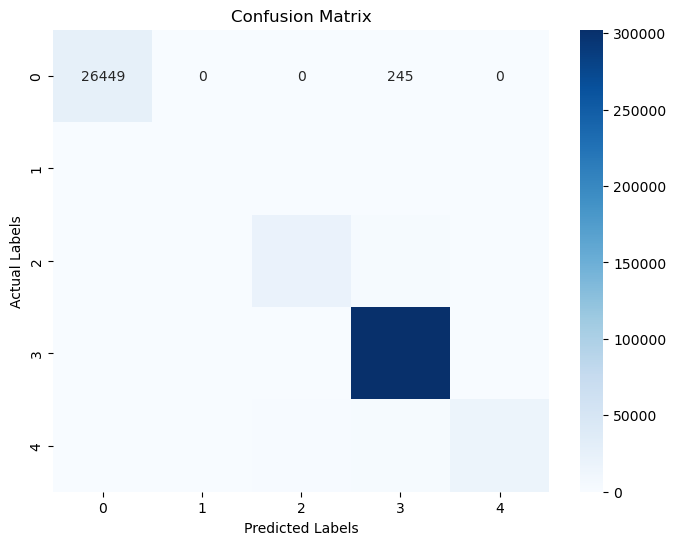

In [225]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Assuming `y_test` is your actual labels and `y_pred` is your predicted labels

# Generate Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
labels = np.unique(y_test)  # Get class labels

# 📌 Plot the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix")
plt.show()



In [198]:
# Retrieve the mapping
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Print the mapping
print(label_mapping)


{'DoS/DDoS': 0, 'Injection': 1, 'Malware': 2, 'Normal': 3, 'Reconnaissance': 4}


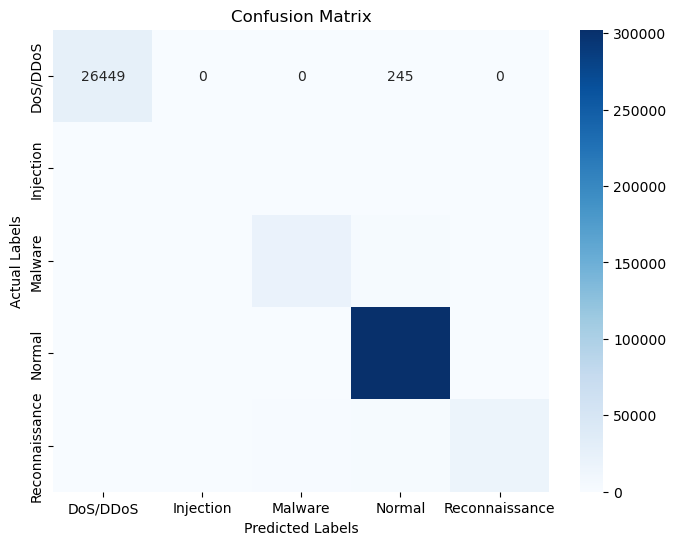

In [213]:
# Define label mapping (reverse of encoding)
label_mapping = {0: 'DoS/DDoS', 1: 'Injection', 2: 'Malware', 3: 'Normal', 4: 'Reconnaissance'}

# Generate Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Convert numeric labels to real class names
labels = [label_mapping[i] for i in np.unique(y_test)]  # Get the actual class names

# 📌 Plotting the Confusion Matrix with Real Labels
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix")
plt.show()


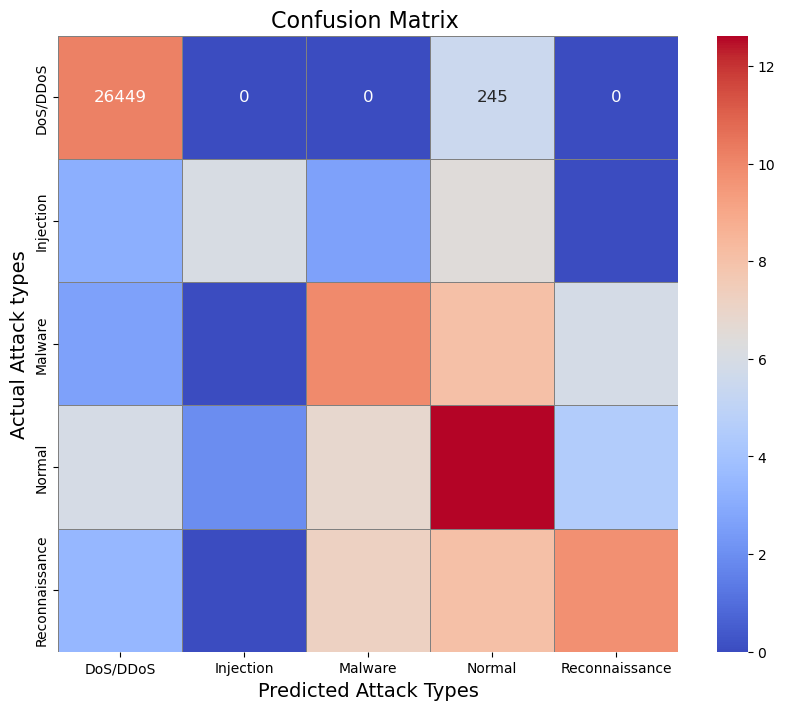

In [235]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define label mapping (replace numbers with real class names)
label_mapping = {0: 'DoS/DDoS', 1: 'Injection', 2: 'Malware', 3: 'Normal', 4: 'Reconnaissance'}
labels = [label_mapping[i] for i in np.unique(y_test)]  # Get real class labels

# Generate Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Normalize using log scale (prevent small numbers from being unreadable)
cm_display = np.log1p(cm)  # log1p(x) = log(1 + x), avoids log(0) issue

# 📌 Plot the Confusion Matrix with Improved Visibility
plt.figure(figsize=(10, 8))
sns.heatmap(cm_display, annot=cm, fmt='d', cmap='coolwarm', xticklabels=labels, yticklabels=labels,
            annot_kws={"size": 12}, linewidths=0.5, linecolor='gray')

plt.xlabel("Predicted Attack Types", fontsize=14)
plt.ylabel("Actual Attack types", fontsize=14)
plt.title("Confusion Matrix ", fontsize=16)
plt.show()


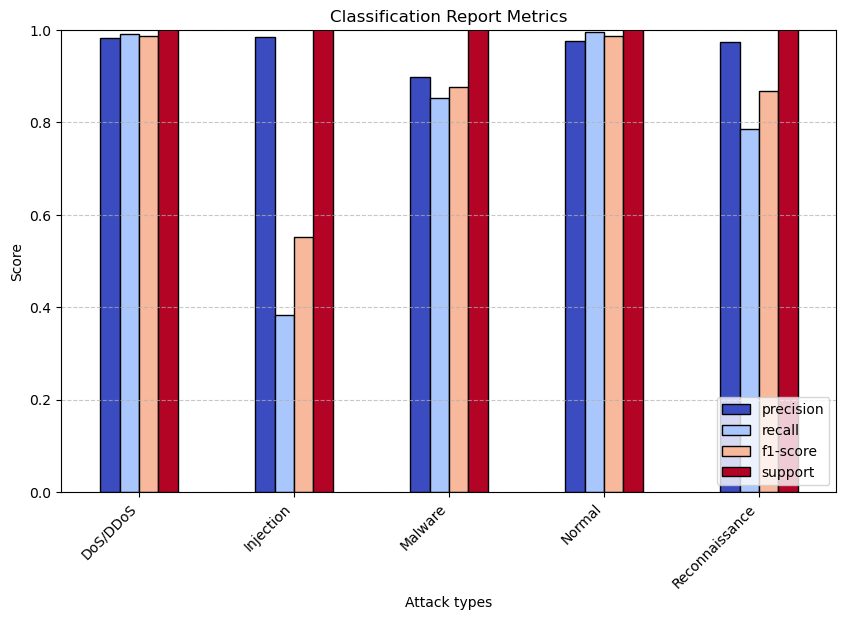

In [215]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Define label mapping (reverse of encoding)
label_mapping = {0: 'DoS/DDoS', 1: 'Injection', 2: 'Malware', 3: 'Normal', 4: 'Reconnaissance'}

# Generate Classification Report as a dictionary
report = classification_report(y_test, y_pred, output_dict=True)

# Convert to DataFrame
df_report = pd.DataFrame(report).T

# Drop unwanted rows that are not actual classes
df_report = df_report.drop(index=['accuracy', 'macro avg', 'weighted avg'], errors='ignore')

# Rename index: Convert numeric indices to actual class names
df_report.index = df_report.index.map(lambda x: label_mapping[int(x)] if x.isdigit() else x)

# 📌 Plot the Classification Report as a Bar Chart
df_report.plot(kind="bar", figsize=(10, 6), colormap="coolwarm", edgecolor="black")
plt.title("Classification Report Metrics")
plt.xlabel("Attack ")
plt.ylabel("Score")
plt.ylim(0, 1)  # Ensure values are between 0 and 1
plt.xticks(rotation=45, ha="right")
plt.legend(loc="lower right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()


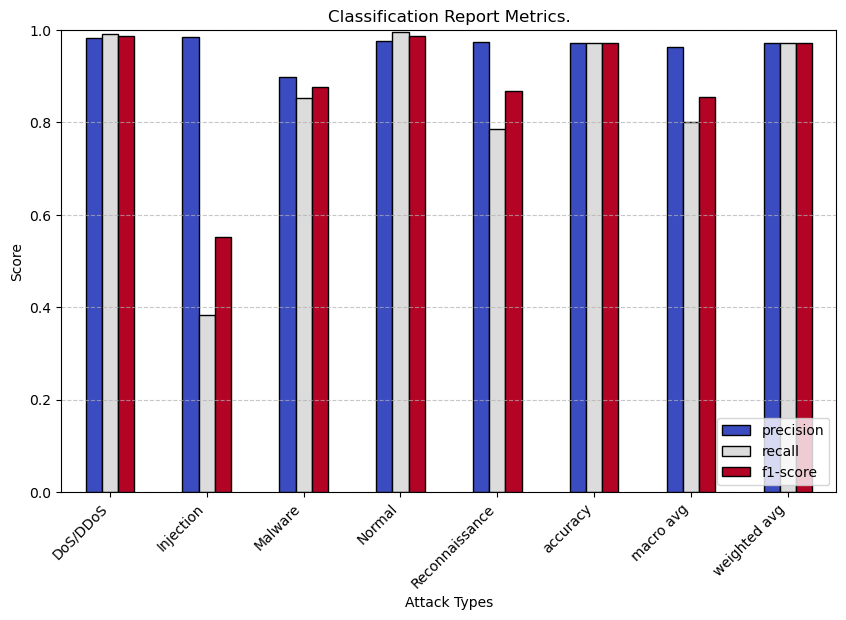

In [219]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Define label mapping (reverse of encoding)
label_mapping = {0: 'DoS/DDoS', 1: 'Injection', 2: 'Malware', 3: 'Normal', 4: 'Reconnaissance'}

# Generate Classification Report as a dictionary
report = classification_report(y_test, y_pred, output_dict=True)

# Convert to DataFrame
df_report = pd.DataFrame(report).T

# Drop the "support" column for better visualization
df_report = df_report.drop(columns=['support'], errors='ignore')

# Rename index: Convert keys to integers first, then map them to actual labels
df_report.index = df_report.index.map(lambda x: label_mapping[int(x)] if x.isdigit() else x)

# 📌 Plot the Classification Report as a Bar Chart
df_report.plot(kind="bar", figsize=(10, 6), colormap="coolwarm", edgecolor="black")
plt.title("Classification Report Metrics.")
plt.xlabel("Attack Types")
plt.ylabel("Score")
plt.ylim(0, 1)  # Ensure all values are within [0,1] range
plt.xticks(rotation=45, ha="right")
plt.legend(loc="lower right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()
